# CIS242-Shark Tank Decision Tree
Code to run Decision Tree on "shark_tank_clean.csv"

Variables used: industry, valuation, likelihood of a deal

In [ ]:
# General Imports
import pandas as pd
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt

# From Scikit-learn:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, 
    recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
# Create the Dataframe
df = pd.read_csv("shark_tank_data_clean.csv")

In [ ]:
df.head()

,Unnamed: 0,deal_True,category,askedfor,exchangeforstake,valuation,title,multEntr_True
0,0,0,Novelties,1000000,15,6666667,Ionic Ear,0
1,1,1,Specialty Food,460000,10,4600000,Mr. Tod's Pie Factory,0
2,2,1,Baby and Child Care,50000,15,333333,Ava the Elephant,0
3,3,0,Consumer Services,250000,25,1000000,College Foxes Packing Boxes,0
4,4,0,Consumer Services,1200000,10,12000000,Wispots,0


In [ ]:
# Data Cleaning
del df['askedfor']
del df['exchangeforstake'] 
del df['title']

df.head()

,deal_True,category,valuation,multEntr_True
0,0,Novelties,6666667,0
1,1,Specialty Food,4600000,0
2,1,Baby and Child Care,333333,0
3,0,Consumer Services,1000000,0
4,0,Consumer Services,12000000,0


In [ ]:
# Set Valuations to a categorical variable based on ranges

# y is whether the deal_true
y = df.deal_True

# X is all the other columns
X = df.iloc[:, 1:]

le = LabelEncoder()
X["category_encoded"] = le.fit_transform(X["category"])
del X["category"]
X.head()


,valuation,multEntr_True,category_encoded
0,6666667,0,35
1,4600000,0,44
2,333333,0,2
3,1000000,0,7
4,12000000,0,7


In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split (X, y, 
                                                     test_size = 0.2, 
                                                     random_state = 42)

In [ ]:
# Inspect the testing and training data dimensions

print (tabulate ( [
    [ "X Training:", X_train.shape [0], X_train.shape [1] ],
    [ "X Testing:", X_test.shape [0], X_test.shape [1] ],
    [ "Y Training:", y_train.shape [0], 1 ],
    [ "Y Testing:", y_test.shape [0], 1 ],
    ],
    headers = ["Key", "Rows", "Columns" ],
    tablefmt = "fancy_outline"
    ))

╒═════════════╤════════╤═══════════╕
│ Key         │   Rows │   Columns │
╞═════════════╪════════╪═══════════╡
│ X Training: │    396 │         3 │
│ X Testing:  │     99 │         3 │
│ Y Training: │    396 │         1 │
│ Y Testing:  │     99 │         1 │
╘═════════════╧════════╧═══════════╛


In [ ]:
# Entropy:
# Instantiate a DecisionTreeClassifier object
dt = DecisionTreeClassifier (
    max_depth = 7
)

# Fit the data
dt.fit (X, y)

DecisionTreeClassifier(max_depth=7)

In [ ]:
def inspectDecisionTreeShape (dt):
    # Shows number of split levels and leaf nodes in the decision tree
    print (tabulate ( [
        [ "Number of Split Levels:", dt.tree_.max_depth ],
        [ "Number of Leaf Nodes:", dt.tree_.n_leaves ]
        ],
        headers = ["Key", "Value" ],
        tablefmt = "fancy_outline"
        ))

inspectDecisionTreeShape (dt)

╒═════════════════════════╤═════════╕
│ Key                     │   Value │
╞═════════════════════════╪═════════╡
│ Number of Split Levels: │       7 │
│ Number of Leaf Nodes:   │      37 │
╘═════════════════════════╧═════════╛


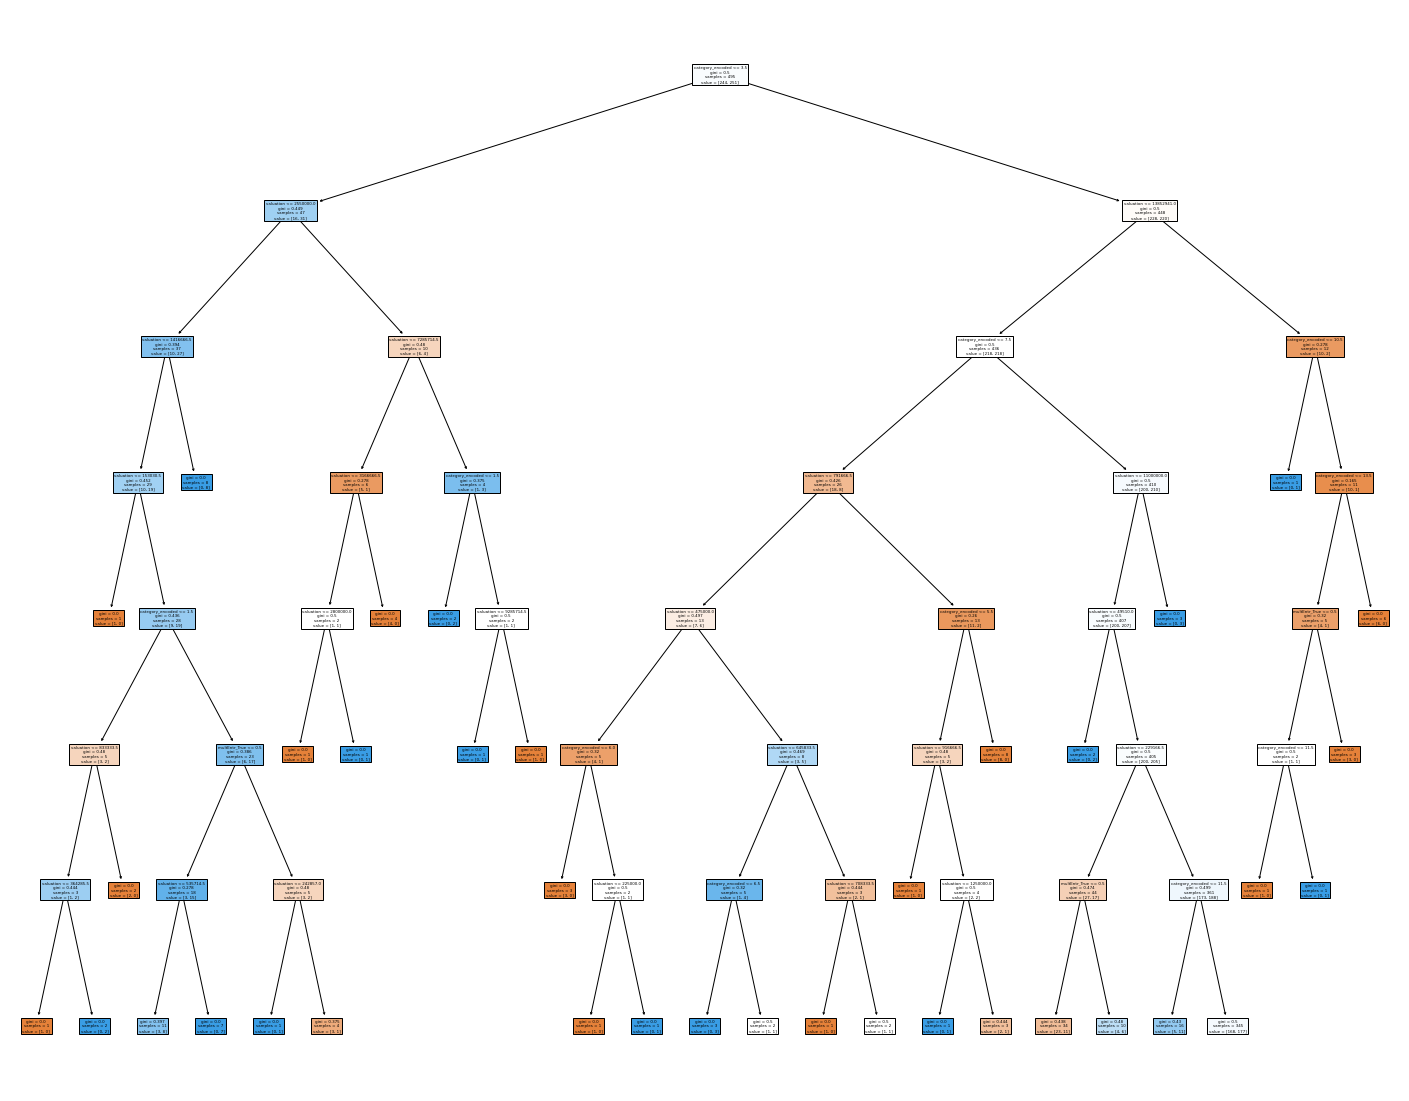

In [ ]:
# Display the Decision Tree

def displayDecisionTreeAsPlot (dt):
    plt.figure (figsize = (25, 20))
    tree.plot_tree (dt, feature_names = X.columns, filled = True)
    plt.show ()

displayDecisionTreeAsPlot (dt)

In [ ]:
# Display the Decision Tree as Text

def displayDecisionTreeAsText (dt):
    text_tree = export_text (dt, feature_names = list (X.columns))
    print (text_tree)

displayDecisionTreeAsText (dt)

|--- category_encoded <= 3.50
|   |--- valuation <= 2550000.00
|   |   |--- valuation <= 1416666.50
|   |   |   |--- valuation <= 153030.50
|   |   |   |   |--- class: 0
|   |   |   |--- valuation >  153030.50
|   |   |   |   |--- category_encoded <= 1.50
|   |   |   |   |   |--- valuation <= 833333.50
|   |   |   |   |   |   |--- valuation <= 364285.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- valuation >  364285.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- valuation >  833333.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- category_encoded >  1.50
|   |   |   |   |   |--- multEntr_True <= 0.50
|   |   |   |   |   |   |--- valuation <= 535714.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- valuation >  535714.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- multEntr_True >  0.50
|   |   |   |   |   |   |--- valuation <= 242857.00
|   |   |   |   |   |   |   |--- class: 1


In [ ]:
# Train (fit) the model with training data
dt.fit (X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
# Use the tree's predict() method with the testing data

dt_pred = dt.predict (X_test)

# Output the accuracy score

print (dt.score (X_test, y_test))
print ()

0.5454545454545454



In [ ]:
# Output the Confusion Matrix

pd.crosstab (dt_pred, y_test, rownames = ["Predicted"], colnames = ["Actual"])

Actual,0,1
Predicted,,
0,22,16
1,32,29
